In [1]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: Consolas; font-size: 16pt;}
div.output { font-size: 16pt; font-weight: bold;}
div.input { font-family: Consolas; font-size: 16pt;}
div.prompt { min-width: 100px;}
</style>
"""))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                          n_redundant=0, n_clusters_per_class=1, 
                          n_classes=2, weights=[0.99, 0.01], 
                          random_state=42)

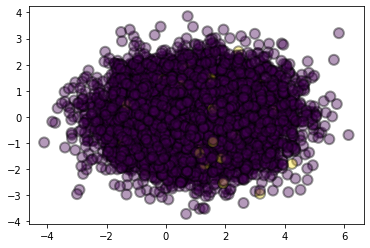

In [4]:
plt.scatter(x=X[:,0], y=X[:,1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2, alpha=0.4)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                  random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_features=2, random_state=42)

In [7]:
rfc_pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rfc_pred)

array([[2960,    0],
       [  36,    4]], dtype=int64)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2960
           1       1.00      0.10      0.18        40

    accuracy                           0.99      3000
   macro avg       0.99      0.55      0.59      3000
weighted avg       0.99      0.99      0.98      3000



In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((19720, 10), (19720,))

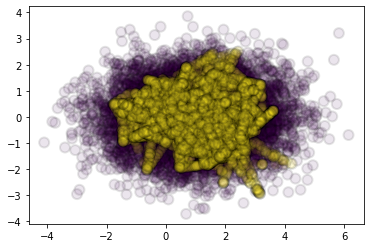

In [10]:
plt.scatter(x=X_resampled[:, 0], y=X_resampled[:, 1], 
            marker='o', c=y_resampled,
            s=100, edgecolor="k", linewidth=2, alpha=0.1)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
        y_resampled, test_size=0.3, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13804, 10), (5916, 10), (13804,), (5916,))

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [13]:
pred = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[2963,    5],
       [  22, 2926]], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2968
           1       1.00      0.99      1.00      2948

    accuracy                           1.00      5916
   macro avg       1.00      1.00      1.00      5916
weighted avg       1.00      1.00      1.00      5916



In [15]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                          n_redundant=0, n_clusters_per_class=1, 
                          n_classes=2, weights=[0.99, 0.01], 
                          random_state=42)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                             stratify=y, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                  class_weight={0:1, 1:1.4},
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

In [18]:
rfc_pred = rf_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                             stratify=y, random_state=42)

from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_r, y_train_r = sm.fit_resample(X_train, y_train)
X_test_r, y_test_r = sm.fit_resample(X_test, y_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                  random_state=42)
rf_model.fit(X_train_r, y_train_r)

RandomForestClassifier(max_features=2, random_state=42)

In [21]:
y_pred_rfc = rf_model.predict(X_test_r)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_r, y_pred_rfc)

array([[2954,    4],
       [1630, 1328]], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
def get_f1score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    precision = cm[1,1] / (cm[0,1]+cm[1,1])
    recall = cm[1,1] / (cm[1,0]+cm[1,1])
    f_measure = (2*precision*recall) / (precision+recall)
    return f_measure

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def model_measure(model, X, y, test_size=0.3) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = cm[1,1] / (cm[0,1]+cm[1,1])
    recall = cm[1,1] / (cm[1,0]+cm[1,1])
    f_measure = (2*precision*recall) / (precision+recall)
#   print(f"precision: {precision}, recall: {recall}, f-measure: {f_measure}")
    return precision, recall, f_measure

In [24]:
from sklearn.ensemble import RandomForestClassifier
model_measure(RandomForestClassifier(n_estimators=100, max_features=2, random_state=42), 
              X_resampled, y_resampled)

(0.9975878704341833, 0.9914383561643836, 0.994503607007901)

In [25]:
from sklearn.svm import SVC
model_measure(SVC(random_state=42), X_resampled, y_resampled)

(0.9747983870967742, 0.968937875751503, 0.9718592964824121)

In [26]:
from sklearn.neural_network import MLPClassifier
model_measure(MLPClassifier(hidden_layer_sizes=(50,), max_iter=500), X_resampled, y_resampled)

(0.9801561483409239, 0.9980125869493209, 0.989003774823568)

In [27]:
from xgboost import XGBClassifier  # pip install xgboost
model_measure(XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01),
              X_resampled, y_resampled)

C:\Users\COM\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.9689839572192513, 0.9087261785356068, 0.9378881987577641)

In [28]:
from lightgbm import LGBMClassifier #  # pip install lightgbm
model_measure(LGBMClassifier(n_estimators=100), X_resampled, y_resampled)

(0.9901158827539196, 0.9901158827539196, 0.9901158827539196)

In [29]:
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, 
                                   random_state=42)
xgb_model = XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01, 
                          eval_metric='logloss', use_label_encoder=False)
lgb_model = LGBMClassifier(n_estimators=100)

In [30]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[("rfc", rf_model), 
                                            ("xgb", xgb_model),
                                            ("lgbm", lgb_model)],
                                voting="hard")

In [31]:
ests = voting_model.fit(X_resampled, y_resampled)
ests.named_estimators_

{'rfc': RandomForestClassifier(max_features=2, random_state=42),
 'xgb': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=0.01, max_delta_step=0,
               max_depth=10, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=None),
 'lgbm': LGBMClassifier()}

In [32]:
ests.get_params()

{'estimators': [('rfc',
   RandomForestClassifier(max_features=2, random_state=42)),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=None,
                 enable_categorical=False, eval_metric='logloss', gamma=None,
                 gpu_id=None, importance_type=None, interaction_constraints=None,
                 learning_rate=0.01, max_delta_step=None, max_depth=10,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, reg_alpha=None,
                 reg_lambda=None, scale_pos_weight=None, subsample=None,
                 tree_method=None, use_label_encoder=False,
                 validate_parameters=None, verbosity=None)),
  ('lgbm', LGBMClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights'

In [33]:
model_measure(voting_model, X_resampled, y_resampled)

(0.9920634920634921, 0.9896729776247849, 0.9908667930380839)